Library imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score

import utilities2 as utils

Loads the datacube

In [2]:
data = utils.load_dataset()
# data.head()

In [3]:
# modifies presence / absence columns to boolean - geology properties
data["Geology_Dictionary_Alkalic"] = data["Geology_Dictionary_Alkalic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Anatectic"] = data["Geology_Dictionary_Anatectic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Calcareous"] = data["Geology_Dictionary_Calcareous"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Carbonaceous"] = data["Geology_Dictionary_Carbonaceous"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Cherty"] = data["Geology_Dictionary_Cherty"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_CoarseClastic"] = data["Geology_Dictionary_CoarseClastic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Evaporitic"] = data["Geology_Dictionary_Evaporitic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Felsic"] = data["Geology_Dictionary_Felsic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_FineClastic"] = data["Geology_Dictionary_FineClastic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Gneissose"] = data["Geology_Dictionary_Gneissose"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Igneous"] = data["Geology_Dictionary_Igneous"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Intermediate"] = data["Geology_Dictionary_Intermediate"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Pegmatitic"] = data["Geology_Dictionary_Pegmatitic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_RedBed"] = data["Geology_Dictionary_RedBed"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Schistose"] = data["Geology_Dictionary_Schistose"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Sedimentary"] = data["Geology_Dictionary_Sedimentary"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_UltramaficMafic"] = data["Geology_Dictionary_UltramaficMafic"].apply(lambda x: True if x == "Present" else False)
# modifies presence / absence columns to boolean - labels
data["Training_MVT_Deposit"] = data["Training_MVT_Deposit"].apply(lambda x: True if x == "Present" else False)
data["Training_MVT_Occurrence"] = data["Training_MVT_Occurrence"].apply(lambda x: True if x == "Present" else False)
# data["Training_CD_Deposit"] = data["Training_CD_Deposit"].apply(lambda x: True if x == "Present" else False)
# data["Training_CD_Occurrence"] = data["Training_CD_Occurrence"].apply(lambda x: True if x == "Present" else False)

Selects the data /labels used for MVT WOE baseline

In [4]:
cols_dict = utils.load_features_dict(type='MVT', baseline='updated')
data_filtered, cols = utils.extract_cols(data, cols_dict)

data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5164970 entries, 0 to 5164969
Data columns (total 26 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   H3_Geometry                                     object 
 1   Geology_Lithology_Majority                      object 
 2   Geology_Period_Maximum_Minority                 object 
 3   Geology_Period_Minimum_Minority                 object 
 4   Sedimentary_Dictionary                          bool   
 5   Igneous_Dictionary                              bool   
 6   Metamorphic_Dictionary                          bool   
 7   Seismic_LAB_Priestley                           float64
 8   Seismic_Moho                                    float64
 9   Gravity_GOCE_ShapeIndex                         float64
 10  Geology_Paleolatitude_Period_Maximum            float64
 11  Terrane_Proximity                               float64
 12  Geology_PassiveMargin_Proxim

In [5]:
data_filtered.columns

Index(['H3_Geometry', 'Geology_Lithology_Majority',
       'Geology_Period_Maximum_Minority', 'Geology_Period_Minimum_Minority',
       'Sedimentary_Dictionary', 'Igneous_Dictionary',
       'Metamorphic_Dictionary', 'Seismic_LAB_Priestley', 'Seismic_Moho',
       'Gravity_GOCE_ShapeIndex', 'Geology_Paleolatitude_Period_Maximum',
       'Terrane_Proximity', 'Geology_PassiveMargin_Proximity',
       'Geology_BlackShale_Proximity', 'Geology_Fault_Proximity',
       'Gravity_Bouguer', 'Gravity_Bouguer_HGM',
       'Gravity_Bouguer_UpCont30km_HGM', 'Gravity_Bouguer_HGM_Worms_Proximity',
       'Gravity_Bouguer_UpCont30km_HGM_Worms_Proximity', 'Magnetic_HGM',
       'Magnetic_LongWavelength_HGM', 'Magnetic_HGM_Worms_Proximity',
       'Magnetic_LongWavelength_HGM_Worms_Proximity', 'Training_MVT_Deposit',
       'Training_MVT_Occurrence'],
      dtype='object')

In [6]:
cols

['H3_Geometry',
 'Geology_Lithology_Majority',
 'Geology_Period_Maximum_Minority',
 'Geology_Period_Minimum_Minority',
 'Sedimentary_Dictionary',
 'Igneous_Dictionary',
 'Metamorphic_Dictionary',
 'Seismic_LAB_Priestley',
 'Seismic_Moho',
 'Gravity_GOCE_ShapeIndex',
 'Geology_Paleolatitude_Period_Maximum',
 'Terrane_Proximity',
 'Geology_PassiveMargin_Proximity',
 'Geology_BlackShale_Proximity',
 'Geology_Fault_Proximity',
 'Gravity_Bouguer',
 'Gravity_Bouguer_HGM',
 'Gravity_Bouguer_UpCont30km_HGM',
 'Gravity_Bouguer_HGM_Worms_Proximity',
 'Gravity_Bouguer_UpCont30km_HGM_Worms_Proximity',
 'Magnetic_HGM',
 'Magnetic_LongWavelength_HGM',
 'Magnetic_HGM_Worms_Proximity',
 'Magnetic_LongWavelength_HGM_Worms_Proximity',
 'Training_MVT_Deposit',
 'Training_MVT_Occurrence']

The following function finds all the neighbors and creates a new column "MVT_Deposit".
Original paper treats neighbors of polygons with "Training_MVT_Deposit=Present" and "Training_MVT_Occurrence=Present" as mineral present, "MVT_Deposit=Present" (note: now Deposit means - Deposit, Occurrence, or their neighbor). 

In [7]:
data_filtered = utils.neighbor_deposits(data_filtered, type='MVT')

In [8]:
data_filtered.columns

Index(['H3_Geometry', 'Geology_Lithology_Majority',
       'Geology_Period_Maximum_Minority', 'Geology_Period_Minimum_Minority',
       'Sedimentary_Dictionary', 'Igneous_Dictionary',
       'Metamorphic_Dictionary', 'Seismic_LAB_Priestley', 'Seismic_Moho',
       'Gravity_GOCE_ShapeIndex', 'Geology_Paleolatitude_Period_Maximum',
       'Terrane_Proximity', 'Geology_PassiveMargin_Proximity',
       'Geology_BlackShale_Proximity', 'Geology_Fault_Proximity',
       'Gravity_Bouguer', 'Gravity_Bouguer_HGM',
       'Gravity_Bouguer_UpCont30km_HGM', 'Gravity_Bouguer_HGM_Worms_Proximity',
       'Gravity_Bouguer_UpCont30km_HGM_Worms_Proximity', 'Magnetic_HGM',
       'Magnetic_LongWavelength_HGM', 'Magnetic_HGM_Worms_Proximity',
       'Magnetic_LongWavelength_HGM_Worms_Proximity', 'Training_MVT_Deposit',
       'Training_MVT_Occurrence', 'MVT_Deposit', 'MVT_Deposit_wNeighbors'],
      dtype='object')

In [9]:
print(data_filtered['Training_MVT_Deposit'].value_counts())
print(data_filtered['Training_MVT_Occurrence'].value_counts())
print(data_filtered['MVT_Deposit'].value_counts())
print(data_filtered['MVT_Deposit_wNeighbors'].value_counts())

Training_MVT_Deposit
False    5164757
True         213
Name: count, dtype: int64
Training_MVT_Occurrence
False    5163156
True        1814
Name: count, dtype: int64
MVT_Deposit
False    5162943
True        2027
Name: count, dtype: int64
MVT_Deposit_wNeighbors
False    5155482
True        9488
Name: count, dtype: int64


In [10]:
# labels_filtered = data_filtered['MVT_Deposit_wNeighbors']

labels_mvt_deposit_only = data_filtered['Training_MVT_Deposit']
labels_mvt_occurrence_only = data_filtered['Training_MVT_Occurrence']
labels_mvt_deposit_n_occurrence = data_filtered['MVT_Deposit']
labels_mvt_deposit_n_occurrence_n_neighbors = data_filtered['MVT_Deposit_wNeighbors']

data_filtered = data_filtered.drop(columns=['H3_Geometry', 'Training_MVT_Deposit', 'Training_MVT_Occurrence', 'MVT_Deposit', 'MVT_Deposit_wNeighbors'])
cols = cols[1:-2]

In [11]:
data_filtered.columns

Index(['Geology_Lithology_Majority', 'Geology_Period_Maximum_Minority',
       'Geology_Period_Minimum_Minority', 'Sedimentary_Dictionary',
       'Igneous_Dictionary', 'Metamorphic_Dictionary', 'Seismic_LAB_Priestley',
       'Seismic_Moho', 'Gravity_GOCE_ShapeIndex',
       'Geology_Paleolatitude_Period_Maximum', 'Terrane_Proximity',
       'Geology_PassiveMargin_Proximity', 'Geology_BlackShale_Proximity',
       'Geology_Fault_Proximity', 'Gravity_Bouguer', 'Gravity_Bouguer_HGM',
       'Gravity_Bouguer_UpCont30km_HGM', 'Gravity_Bouguer_HGM_Worms_Proximity',
       'Gravity_Bouguer_UpCont30km_HGM_Worms_Proximity', 'Magnetic_HGM',
       'Magnetic_LongWavelength_HGM', 'Magnetic_HGM_Worms_Proximity',
       'Magnetic_LongWavelength_HGM_Worms_Proximity'],
      dtype='object')

Clearly the dataset has MANY outliers, as reported in the paper

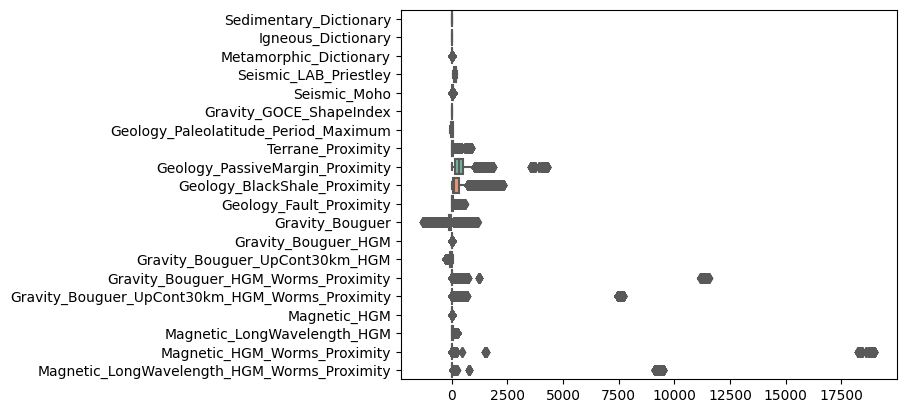

In [12]:
ax = sns.boxplot(data=data_filtered, orient="h", palette="Set2")

We can remove these outliers

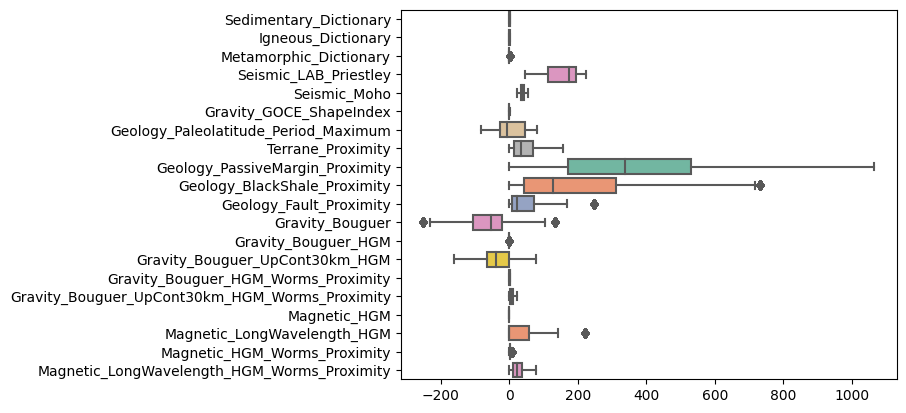

In [13]:
data_filtered = utils.tukey_remove_outliers(data_filtered)
ax = sns.boxplot(data=data_filtered, orient="h", palette="Set2")

There are also many NaNs in the data, these can be "imputed" with the mean value.

In [14]:
print(data_filtered.isna().sum())

Geology_Lithology_Majority                              0
Geology_Period_Maximum_Minority                     57181
Geology_Period_Minimum_Minority                     57181
Sedimentary_Dictionary                                  0
Igneous_Dictionary                                      0
Metamorphic_Dictionary                                  0
Seismic_LAB_Priestley                                   0
Seismic_Moho                                         1307
Gravity_GOCE_ShapeIndex                                 0
Geology_Paleolatitude_Period_Maximum              1271352
Terrane_Proximity                                       0
Geology_PassiveMargin_Proximity                         0
Geology_BlackShale_Proximity                            0
Geology_Fault_Proximity                                 0
Gravity_Bouguer                                     36401
Gravity_Bouguer_HGM                                 36445
Gravity_Bouguer_UpCont30km_HGM                      36427
Gravity_Bougue

In [15]:
data_filtered = utils.impute_nans(data_filtered)
print(data_filtered.isna().sum())

Geology_Lithology_Majority                        0
Geology_Period_Maximum_Minority                   0
Geology_Period_Minimum_Minority                   0
Sedimentary_Dictionary                            0
Igneous_Dictionary                                0
Metamorphic_Dictionary                            0
Seismic_LAB_Priestley                             0
Seismic_Moho                                      0
Gravity_GOCE_ShapeIndex                           0
Geology_Paleolatitude_Period_Maximum              0
Terrane_Proximity                                 0
Geology_PassiveMargin_Proximity                   0
Geology_BlackShale_Proximity                      0
Geology_Fault_Proximity                           0
Gravity_Bouguer                                   0
Gravity_Bouguer_HGM                               0
Gravity_Bouguer_UpCont30km_HGM                    0
Gravity_Bouguer_HGM_Worms_Proximity               0
Gravity_Bouguer_UpCont30km_HGM_Worms_Proximity    0
Magnetic_HGM

Finally, it can be observed the above data is not "normalized", we should make features standard scores / z-scores

(note remaining outliers above were within the Tukey fences calculated over ALL the data)


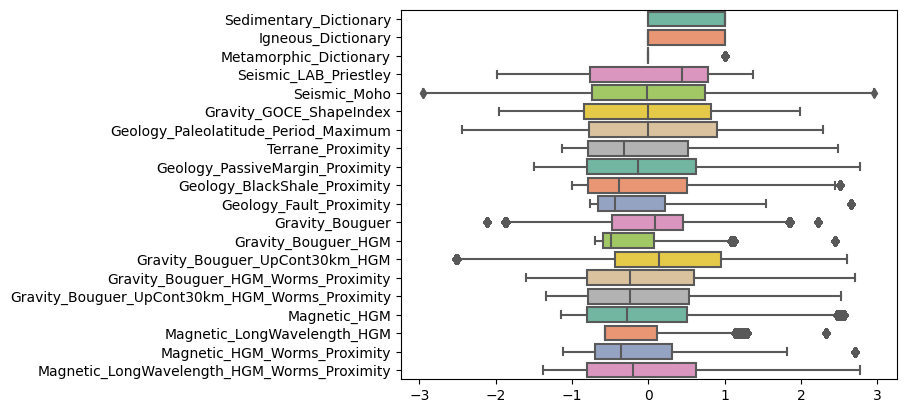

In [16]:
data_filtered = utils.normalize_df(data_filtered)
ax = sns.boxplot(data=data_filtered, orient="h", palette="Set2")
print("(note remaining outliers above were within the Tukey fences calculated over ALL the data)")

Discretizes the continuous variables in 5 bins

In [17]:
nbins = 5
for col in cols:
    if data_filtered[col].dtype != "float64": continue
    data_filtered[col] = pd.qcut(data_filtered[col], nbins)

In [18]:
data_filtered["target"] = labels_mvt_deposit_n_occurrence
data_filtered["target2"] = labels_mvt_deposit_n_occurrence_n_neighbors

Computes WOE / IV for each variable

In [19]:
lst = []
IV_df = pd.DataFrame(columns=['Variable','IV'])
for col in cols: #data_filtered.columns:
    if col == 'DEFAULTER': continue
    else:
        df, iv = utils.calculate_woe_iv(data_filtered, col, 'target2')  # <- Note: I have replace 'target' with 'target2'
               
    lst.append(df)
    IV_df = pd.concat([IV_df, pd.DataFrame([{"Variable" :col ,"IV" : iv,}])],ignore_index=True)

/Users/e35547/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/e35547/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Merge the WOE data into the existig input datacube

In [20]:
# shows the overall IV for all variables on MVT deposits/occurences
print(f"Information Value Overview:\n{IV_df}\n\n\n")

# shows the WOE for all variables on MVT deposits/occurences
df_result = data_filtered
for i, col in enumerate(cols):
    col_data = lst[i]
    col_data = col_data.rename(columns={"Value":col,"WoE":f"{col}_WoE", "IV":f"{col}_IV"})
    df_result = pd.merge(df_result, col_data[[col,f"{col}_WoE",f"{col}_IV"]], on=col)

Information Value Overview:
                                          Variable        IV
0                       Geology_Lithology_Majority  1.911107
1                  Geology_Period_Maximum_Minority  2.145210
2                  Geology_Period_Minimum_Minority  2.694937
3                           Sedimentary_Dictionary  0.620704
4                               Igneous_Dictionary  0.405019
5                           Metamorphic_Dictionary  0.142803
6                            Seismic_LAB_Priestley  0.881937
7                                     Seismic_Moho  0.583543
8                          Gravity_GOCE_ShapeIndex  0.143461
9             Geology_Paleolatitude_Period_Maximum  1.730762
10                               Terrane_Proximity  0.003090
11                 Geology_PassiveMargin_Proximity  0.595544
12                    Geology_BlackShale_Proximity  0.365363
13                         Geology_Fault_Proximity  0.210711
14                                 Gravity_Bouguer  0.338

Combines the WOE for each comlumn

In [21]:
df_result["WOE Total"] = df_result.loc[:,[f"{col}_WoE" for col in cols]].sum(axis=1)

Adds the latitudes to the datacube to make train, validation, and test splits

In [22]:
df_result["Latitude_EPSG4326"] = data["Latitude_EPSG4326"]
te_df, tr_df, splits = utils.get_spatial_cross_val_idx(df_result, colname='target') # <- only using Deposit and Occurrence for Cross-Val.

In [23]:
auc_score = roc_auc_score(tr_df["target2"],tr_df["WOE Total"])
print(f"Train AUC score:{auc_score}")
auc_score = roc_auc_score(te_df["target2"],te_df["WOE Total"])
print(f"Test AUC score:{auc_score}")
auc_score = roc_auc_score(df_result["target2"],df_result["WOE Total"])
print(f"All AUC score:{auc_score}")

Train AUC score:0.9133803448182163
Test AUC score:0.9156471911303101
All AUC score:0.913768828771653


Shows the cross validation splits (train / val); test split is held out of cross validation

In [24]:
# for i, (train_index, val_index) in enumerate(splits):
#     print(f"Fold {i}:")
#     print(f"  Train: groups={np.unique(tr_df.iloc[train_index.tolist()]['group'].tolist())}")
#     print(f"  Val: groups={np.unique(tr_df.iloc[val_index.tolist()]['group'].tolist())}")